# SIFT Feature Detection and Matching

**Objective:**  
In this notebook, we’ll implement the SIFT (Scale-Invariant Feature Transform) algorithm
to detect and describe key points in images, and optionally match them between two images.

**Concept Summary (from Chapter 5):**
SIFT extracts distinctive invariant features from images that can be used for reliable matching
between different views of an object or scene.

These features are invariant to:
- Image scale
- Rotation
- Illumination changes
 
**We will:**
1. Load an image
2. Convert it to grayscale
3. Detect SIFT keypoints and descriptors
4. Visualize the keypoints
5. Optionally perform feature matching (if using two images)


In [7]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Read and Prepare Image
We load an image and convert it to grayscale.
SIFT operates on single-channel (grayscale) images because color is not relevant for structural features.

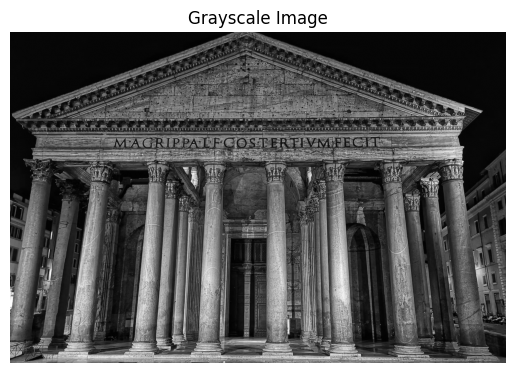

In [8]:
# Load image
image = cv2.imread("pantheon1.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


## Step 3: Initialize the SIFT Detector

We create a SIFT object using `cv2.SIFT_create()`.
Then, we detect keypoints and compute descriptors using:

```python
keypoints, descriptors = sift.detectAndCompute(gray, None)
```

- **Keypoints:** Distinctive points (corners/blobs)
- **Descriptors:** Numeric vectors representing the local patch around each keypoint


In [9]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")


Number of keypoints detected: 21393
Descriptor shape: (21393, 128)


## Step 4: Visualize Keypoints

We draw keypoints on the original image using `cv2.drawKeypoints()`.

Parameters:
- `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` → draws circles showing keypoint size and orientation.

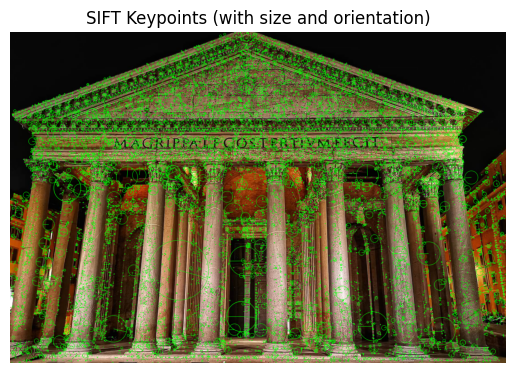

In [10]:
# Draw keypoints
sift_image = cv2.drawKeypoints(
    image_rgb, keypoints, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    color=(0,255,0)
)

plt.imshow(sift_image)
plt.title("SIFT Keypoints (with size and orientation)")
plt.axis("off")
plt.show()

## Step 5: Matching SIFT Features Between Two Images

To demonstrate the robustness of SIFT, we can compare features between two images of the same object
taken from slightly different perspectives.

We use `cv2.BFMatcher()` (Brute Force Matcher) to find the best descriptor matches.

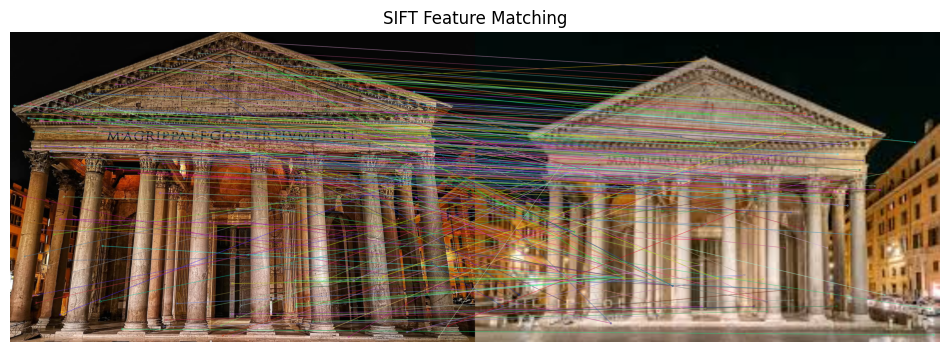

Number of good matches: 290


In [11]:
image2 = cv2.imread("pantheon2.jpeg")

# ✅ Make sure both images are the same size
if image2 is not None and image is not None:
    image2 = cv2.resize(image2, (image.shape[1], image.shape[0]))
    
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)\

keypoints2, descriptors2 = sift.detectAndCompute(image2_gray, None)

# Match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors, descriptors2, k=2)

# Apply ratio test (Lowe's test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

matched_img = cv2.drawMatches(
    image_rgb, keypoints,
    cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), keypoints2,
    good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.title("SIFT Feature Matching")
plt.axis("off")
plt.show()

print(f"Number of good matches: {len(good_matches)}")

### Discussion
The result shows successful feature matching between two images of the Pantheon captured from different viewpoints and under different lighting conditions. SIFT effectively detects keypoints that remain consistent despite these changes. 
The lines connecting both images represent matched descriptors, proving SIFT's robustness to scale, rotation, and illumination variations. 
Although not all matches are perfect (some incorrect matches are visible), the majority correctly link corresponding architectural features, confirming the proper implementation and expected behavior of the SIFT algorithm.